In [2]:
import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import re

In [240]:
#calling URL
URL = 'https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city'
realpage = requests.get(URL)
realpage.status_code

200

In [241]:
soup = BeautifulSoup(realpage.text)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <title>
   House for Rent in Hyderabad, Rental Flats, Apartments for Rent in Hyderabad, Rent Property in Hyderabad City: Makaan.com
  </title>
  <meta content="Looking flats for rent in Hyderabad? Search for all residential apartments for rent in Hyderabad. Find rental flats, houses for rent property in Hyderabad city at Makaan.com property website." name="description"/>
  <meta content="houses for rent in Hyderabad, rental flats in Hyderabad, apartments for rent in Hyderabad, flats for rent in Hyderabad, rent house in Hyderabad, rent property in Hyderabad, makaan, makaan.com" name="keywords"/>
  <meta content="#fff" id="themeColor" name="theme-color"/>
  <meta content="origin" name="referrer"/>
  <meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/>
  <meta content="155462194517712" name="fb:pages"/>
  <meta content="India" name="country"/>
  <meta cont

In [161]:
## details from webpage

#Price = div price-link (it's in data-type)
#Title = div title-line-wrap
#Size = td size
#Location = div locWrap
#Furnished = td val
#Bathroom and deposit = ul listing-details
# sellerinfo = div seller-info

In [242]:
## as we need 30 rows get multiple pages data
for i in range(1,50):
    url = 'https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?page={}&_=1648140480644'.format(i)


In [243]:
Price = []
Title = []
Size = []
Location = []
Furnished = []
Bathroom_deposit = []
Sellerinfo = []

for i in range(1,16):
    url = 'https://www.makaan.com/hyderabad-residential-property/rent-property-in-hyderabad-city?page={}&_=1648140480644'.format(i)


    pages = requests.get(url)
    soup = BeautifulSoup(pages.text)
## block is the complete single add in realestate - from that block individual key has been taken rather than only key 
#(only key is also possible and  mention the missing values with Nan)
# below I took block and key
    for block in soup.find_all("div",class_="infoWrap"):

        title = block.find("div",class_= "title-line")
        if title is None:
            Title.append(np.NaN)
        else:
            Title.append(title.text)
        
        price = block.find('div', attrs = {'data-type':'price-link'})
        if price is None:
            Price.append(np.NaN)
        else:
            Price.append(price.text)
            
        size = block.find('td', class_='size')
        if size is None:
            Size.append(np.NaN)
        else:
            Size.append(size.text)
        
        location = block.find('div', class_='locWrap')
        if location is None:
            Location.append(np.Nan)
        else:
            Location.append(location.text)
            
        furnished = block.find('td', class_='val')
        if furnished is None:
            Furnished.append(np.NaN)
        else:
            Furnished.append(furnished.text)
        
        seller = block.find('div', class_='seller-info')
        if seller is None:
            Sellerinfo.append(np.NaN)
        else:
            Sellerinfo.append(seller.text)
            
        dipbat = block.find('ul', class_='listing-details')
        if dipbat is None:
            Bathroom_deposit.append(np.Nan)
        else:
            Bathroom_deposit.append(dipbat.text)
        
        
        

In [244]:
df = pd.DataFrame({'Title': Title, 'Square Feet': Size, 'Location':Location,'Price': Price,'Furnished' : Furnished,'Number of Bathroom' : Bathroom_deposit, 'Sellerinfo': Sellerinfo})


In [245]:
df.head()

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Sellerinfo
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad","6,720",Furnished,No Deposit1 bathrooms,NaN
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad","8,000",Semi-Furnished,No Deposit1 bathrooms,NaN
2,4 BHK Independent House,1080,"Meerpet, Hyderabad","8,900",Semi-Furnished,No Deposit2 bathrooms,NaN
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad","23,000",Semi-Furnished,No Deposit3 bathrooms,NaN
4,1 RK Studio Apartment,400,"Uppal, Hyderabad","6,500",Furnished,No Deposit1 bathrooms,NaN


In [246]:
df.style.set_properties(**{'text-align': 'left'}, inplace = True)

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Sellerinfo
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad","6,720",Furnished,No Deposit1 bathrooms,nan
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad","8,000",Semi-Furnished,No Deposit1 bathrooms,nan
2,4 BHK Independent House,1080,"Meerpet, Hyderabad","8,900",Semi-Furnished,No Deposit2 bathrooms,nan
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad","23,000",Semi-Furnished,No Deposit3 bathrooms,nan
4,1 RK Studio Apartment,400,"Uppal, Hyderabad","6,500",Furnished,No Deposit1 bathrooms,nan
5,2 BHK Villa in VRR Enclave,1500,"Dammaiguda, Hyderabad","13,000",Semi-Furnished,No Deposit2 bathroomsWest facing,nan
6,1 RK Studio Apartment,670,"Miyapur, Hyderabad","7,000",Semi-Furnished,No Deposit1 bathrooms,nan
7,2 BHK Independent House,1500,"Chandanagar, Hyderabad","12,500",Semi-Furnished,No Deposit2 bathrooms,nan
8,5 BHK Independent House,8000,"Dilsukh Nagar, Hyderabad","55,000",Furnished,No Deposit6 bathroomsWest facing,nan
9,3 BHK Apartment in Janapriya Janapriya Arcadia,1250,"Kowkur, Hyderabad","11,500",Semi-Furnished,No Deposit3 bathroomsWest facing,nan


In [247]:
df.head()

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Sellerinfo
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad","6,720",Furnished,No Deposit1 bathrooms,NaN
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad","8,000",Semi-Furnished,No Deposit1 bathrooms,NaN
2,4 BHK Independent House,1080,"Meerpet, Hyderabad","8,900",Semi-Furnished,No Deposit2 bathrooms,NaN
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad","23,000",Semi-Furnished,No Deposit3 bathrooms,NaN
4,1 RK Studio Apartment,400,"Uppal, Hyderabad","6,500",Furnished,No Deposit1 bathrooms,NaN


In [248]:
df.to_csv('rental.csv', index = False)

In [704]:
df = pd.read_csv("rental.csv")

In [705]:
df.shape

(300, 7)

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               300 non-null    object 
 1   Square Feet         300 non-null    int64  
 2   Location            300 non-null    object 
 3   Price               300 non-null    object 
 4   Furnished           300 non-null    object 
 5   Number of Bathroom  300 non-null    object 
 6   Sellerinfo          0 non-null      float64
dtypes: float64(1), int64(1), object(5)
memory usage: 16.5+ KB


In [707]:
# No data in seller info column - which will be removed
df.drop('Sellerinfo', axis =1, inplace= True)

In [677]:
## Data Cleaning ###

In [678]:
## changing price column to int

In [708]:
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))


In [711]:
df['Price'][55]

' 2.5 L'

In [712]:
for i in df['Price']:
    print(i)

 6720 
 8000 
 8900 
 23000 
 6500 
 13000 
 7000 
 12500 
 55000 
 11500 
 40000 
 8500 
 18000 
 13500 
 16900 
 22500 
 45000 
 20000 
 15000 
 10000 
 43500 
 22000 
 9000 
 12500 
 13000 
 11000 
 8500 
 40000 
 13000 
 17500 
 6500 
 16500 
 42000 
 21000 
 21000 
 6000 
 14000 
 8000 
 17000 
 11000 
 45000 
 18000 
 7300 
 30000 
 12500 
 18000 
 10500 
 17500 
 9000 
 12000 
 25000 
 11000 
 17000 
 20000 
 9000 
 2.5 L
 28000 
 63000 
 30000 
 10000 
 18000 
 13000 
 15000 
 17000 
 13000 
 35000 
 11000 
 23000 
 19500 
 14500 
 56000 
 26000 
 25000 
 28000 
 23000 
 20000 
 15000 
 11000 
 77500 
 14500 
 17000 
 22500 
 8000 
 45000 
 22000 
 10000 
 10000 
 33000 
 25000 
 6700 
 6500 
 13000 
 20000 
 35000 
 23000 
 18000 
 15000 
 50000 
 10000 
 6500 
 12999 
 19800 
 60000 
 10000 
 15000 
 8500 
 10000 
 19000 
 13000 
 6500 
 17500 
 12500 
 30000 
 16000 
 14500 
 7500 
 7000 
 16000 
 16000 
 12000 
 10000 
 17000 
 25000 
 7000 
 40000 
 25000 
 17000 
 17000 


In [713]:
#regex=True is needed if we want the key string to be replaced by value string (e.g. L replaced by "*1e5" in this case)
#*1e5 is the scientific notation of 100000.

df['Price'] = df['Price'].replace({"L":"*1e5"}, regex=True).map(pd.eval).astype(int)

In [714]:
df['Price'][55]

250000

In [685]:
## spliting deposit and bathroomns

In [715]:
print(df['Number of Bathroom'][4])

No Deposit1 bathrooms


In [716]:
regex1 = '(?:\d)'
df['Number of bathroom'] = df['Number of Bathroom'].apply(lambda x: re.findall(regex1,x))
df['Number of bathroom'] = df['Number of bathroom'].apply(lambda x:''.join(x)) ## cannot use x[0] becaues there are some empty lists

In [717]:
df

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Number of bathroom
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,No Deposit1 bathrooms,1
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,No Deposit1 bathrooms,1
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,No Deposit2 bathrooms,2
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,No Deposit3 bathrooms,3
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,No Deposit1 bathrooms,1
...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,No Deposit2 bathroomsNorth facing,2
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,No Deposit2 bathrooms,2
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,No Deposit2 bathrooms,2
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,No Deposit2 bathrooms,2


In [718]:
for i in df["Number of bathroom"]:
    print(i)
## I can see there are some empty rows

1
1
2
3
1
2
1
2
6
3
3
1
2
2
2
1
3
2
2
2
3
2
2
2
2
1
1
4
2
2
1
2
3
2
3
1
2
1
2
2
5
3
2
1
2
2
2
1
3

2
2
2
3
2
6
3
3

2
2
2
3
2
1
3
1
3
2
2
5
2
3
3
3
4
1
2
3
1
2
2
2
2
3
2
2
3
3
1
2
2
3
3
2
3
1
2
2
1
2
2
9
1
2
1
2
3
2
1
2
1
1
2
2
1
2
2
1
1
1
2
3
1
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
2
2
2
2
2
2
2
2
2
2
1
3
3
3
3
3
2
2
2
1
5
1
2
2
3
3
3
3
2
3
3
1
1
1
1
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
4
2
2
3
3
3
2
2
4
3
4
4
2
2
3
2
2
1
3
2
5
2
3
2
4
2
5
1
3
1
2
1
2
1
4
2
1
1
1
1
2
3
1
4
3
3
2
2
2
3
1
2
2
2
1
2
2
1
3
2
6
2
1
2
3
5


3
2
2
2
2
1


In [719]:
df.dtypes

Title                 object
Square Feet            int64
Location              object
Price                  int64
Furnished             object
Number of Bathroom    object
Number of bathroom    object
dtype: object

In [720]:
df[df["Number of bathroom"]==''] ## this rows are empty

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Number of bathroom
49,2 BHK Independent House,981,"Shamshabad, Hyderabad",12000,Unfurnished,No Deposit,
58,2 BHK Apartment,600,"Gachibowli, Hyderabad",30000,Unfurnished,No Deposit,
292,1 RK Studio Apartment,150,"Shilpa Hills, Hyderabad",15500,Furnished,No Deposit,
293,1 RK Studio Apartment,150,"Shilpa Hills, Hyderabad",15000,Furnished,No Deposit,


In [721]:
df["Number of bathroom"] = df["Number of bathroom"].apply(lambda x: x.replace(' ',''))

In [722]:
for i in df["Number of bathroom"]:
    print(i)

1
1
2
3
1
2
1
2
6
3
3
1
2
2
2
1
3
2
2
2
3
2
2
2
2
1
1
4
2
2
1
2
3
2
3
1
2
1
2
2
5
3
2
1
2
2
2
1
3

2
2
2
3
2
6
3
3

2
2
2
3
2
1
3
1
3
2
2
5
2
3
3
3
4
1
2
3
1
2
2
2
2
3
2
2
3
3
1
2
2
3
3
2
3
1
2
2
1
2
2
9
1
2
1
2
3
2
1
2
1
1
2
2
1
2
2
1
1
1
2
3
1
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
2
2
2
2
2
2
2
2
2
2
1
3
3
3
3
3
2
2
2
1
5
1
2
2
3
3
3
3
2
3
3
1
1
1
1
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
4
2
2
3
3
3
2
2
4
3
4
4
2
2
3
2
2
1
3
2
5
2
3
2
4
2
5
1
3
1
2
1
2
1
4
2
1
1
1
1
2
3
1
4
3
3
2
2
2
3
1
2
2
2
1
2
2
1
3
2
6
2
1
2
3
5


3
2
2
2
2
1


In [724]:
df["Number of bathroom"].replace('', np.nan, inplace=True) 

In [725]:
df

,Title,Square Feet,Location,Price,Furnished,Number of Bathroom,Number of bathroom
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,No Deposit1 bathrooms,1
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,No Deposit1 bathrooms,1
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,No Deposit2 bathrooms,2
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,No Deposit3 bathrooms,3
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,No Deposit1 bathrooms,1
...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,No Deposit2 bathroomsNorth facing,2
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,No Deposit2 bathrooms,2
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,No Deposit2 bathrooms,2
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,No Deposit2 bathrooms,2


In [726]:
for i in df["Number of bathroom"]:
    print (i)

1
1
2
3
1
2
1
2
6
3
3
1
2
2
2
1
3
2
2
2
3
2
2
2
2
1
1
4
2
2
1
2
3
2
3
1
2
1
2
2
5
3
2
1
2
2
2
1
3
nan
2
2
2
3
2
6
3
3
nan
2
2
2
3
2
1
3
1
3
2
2
5
2
3
3
3
4
1
2
3
1
2
2
2
2
3
2
2
3
3
1
2
2
3
3
2
3
1
2
2
1
2
2
9
1
2
1
2
3
2
1
2
1
1
2
2
1
2
2
1
1
1
2
3
1
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
2
2
2
2
2
2
2
2
2
2
1
3
3
3
3
3
2
2
2
1
5
1
2
2
3
3
3
3
2
3
3
1
1
1
1
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
4
2
2
3
3
3
2
2
4
3
4
4
2
2
3
2
2
1
3
2
5
2
3
2
4
2
5
1
3
1
2
1
2
1
4
2
1
1
1
1
2
3
1
4
3
3
2
2
2
3
1
2
2
2
1
2
2
1
3
2
6
2
1
2
3
5
nan
nan
3
2
2
2
2
1


In [733]:
df["Number of bathroom"] = df["Number of bathroom"].replace(np.nan, 0).astype(int)

In [734]:
for i in df["Number of bathroom"]:
    print (i)

1
1
2
3
1
2
1
2
6
3
3
1
2
2
2
1
3
2
2
2
3
2
2
2
2
1
1
4
2
2
1
2
3
2
3
1
2
1
2
2
5
3
2
1
2
2
2
1
3
0
2
2
2
3
2
6
3
3
0
2
2
2
3
2
1
3
1
3
2
2
5
2
3
3
3
4
1
2
3
1
2
2
2
2
3
2
2
3
3
1
2
2
3
3
2
3
1
2
2
1
2
2
9
1
2
1
2
3
2
1
2
1
1
2
2
1
2
2
1
1
1
2
3
1
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
2
2
2
2
2
2
2
2
2
2
1
3
3
3
3
3
2
2
2
1
5
1
2
2
3
3
3
3
2
3
3
1
1
1
1
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
1
4
2
2
3
3
3
2
2
4
3
4
4
2
2
3
2
2
1
3
2
5
2
3
2
4
2
5
1
3
1
2
1
2
1
4
2
1
1
1
1
2
3
1
4
3
3
2
2
2
3
1
2
2
2
1
2
2
1
3
2
6
2
1
2
3
5
0
0
3
2
2
2
2
1


In [695]:
##replacing empty values with 0 - and converted to int - as previously it was in object
#df["Number of bathroom"] = df["Number of bathroom"].apply(lambda x: x.replace('','0'))

In [735]:
df.dtypes

Title                 object
Square Feet            int64
Location              object
Price                  int64
Furnished             object
Number of Bathroom    object
Number of bathroom     int64
dtype: object

In [736]:
##Splitting info about deposit..
regex2 = '(?:\w)+ Deposit'
df['Deposit'] = df['Number of Bathroom'].apply(lambda x: re.findall(regex2,x))
df['Deposit'] = df['Deposit'].apply(lambda x:''.join(x))
df.drop('Number of Bathroom', axis =1, inplace= True)

In [737]:
df

,Title,Square Feet,Location,Price,Furnished,Number of bathroom,Deposit
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,1,No Deposit
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,1,No Deposit
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,2,No Deposit
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,3,No Deposit
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,1,No Deposit
...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,2,No Deposit
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,2,No Deposit
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,2,No Deposit
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,2,No Deposit


In [738]:
## Spliting Location for area and city
df['Place'] = df['Location'].apply(lambda x: x.split(' ')[0])
df['Place'] = df['Place'].apply(lambda x: x.replace(',',''))
df['City'] = df['Location'].apply(lambda x: x.split(' ')[-1])

In [739]:
df

,Title,Square Feet,Location,Price,Furnished,Number of bathroom,Deposit,Place,City
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,1,No Deposit,Serilingampally,Hyderabad
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,1,No Deposit,Miyapur,Hyderabad
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,2,No Deposit,Meerpet,Hyderabad
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,3,No Deposit,Kukatpally,Hyderabad
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,1,No Deposit,Uppal,Hyderabad
...,...,...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,2,No Deposit,Begumpet,Hyderabad
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,2,No Deposit,Neredmet,Hyderabad
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,2,No Deposit,Attapur,Hyderabad
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,2,No Deposit,Sainikpuri,Hyderabad


In [415]:
## Splitting number of rooms from Title


In [748]:
regex3 = '(?:\d)'
df['Number of bedroom'] = df['Title'].apply(lambda x: re.findall(regex3,x))
df['Number of bedroom'] = df['Number of bedroom'].apply(lambda x:''.join(x)).astype(int)

In [749]:
df

,Title,Square Feet,Location,Price,Furnished,Number of bathroom,Deposit,Place,City,Number of bedroom,Type of house
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,1,No Deposit,Serilingampally,Hyderabad,1,Studio Apartment
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,1,No Deposit,Miyapur,Hyderabad,1,Independent Floor
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,2,No Deposit,Meerpet,Hyderabad,4,Independent House
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,3,No Deposit,Kukatpally,Hyderabad,3,Apartment
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,1,No Deposit,Uppal,Hyderabad,1,Studio Apartment
...,...,...,...,...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,2,No Deposit,Begumpet,Hyderabad,2,Apartment
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,2,No Deposit,Neredmet,Hyderabad,2,Independent Floor
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,2,No Deposit,Attapur,Hyderabad,2,Independent Floor
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,2,No Deposit,Sainikpuri,Hyderabad,2,Independent House


In [550]:
#regex4 = '(?:\D)+(Apartment|Floor|Villa|House)'
#df['T'] = df['Title'].apply(lambda x: re.findall(regex4,x))

In [750]:
df['Type of house'] = df['Title'].apply(lambda x: x.split(' ')[2:4])
df['Type of house'] = df['Type of house'].apply(lambda x:' '.join(x))
df['Type of house'] = df['Type of house'].str.replace("in","") # this is used to replace all 'in'  unwanted from all rows 

In [751]:
df.dtypes

Title                 object
Square Feet            int64
Location              object
Price                  int64
Furnished             object
Number of bathroom     int64
Deposit               object
Place                 object
City                  object
Number of bedroom      int64
Type of house         object
dtype: object

In [752]:
df

,Title,Square Feet,Location,Price,Furnished,Number of bathroom,Deposit,Place,City,Number of bedroom,Type of house
0,1 RK Studio Apartment,320,"Serilingampally, Hyderabad",6720,Furnished,1,No Deposit,Serilingampally,Hyderabad,1,Studio Apartment
1,1 BHK Independent Floor,700,"Miyapur, Hyderabad",8000,Semi-Furnished,1,No Deposit,Miyapur,Hyderabad,1,Independent Floor
2,4 BHK Independent House,1080,"Meerpet, Hyderabad",8900,Semi-Furnished,2,No Deposit,Meerpet,Hyderabad,4,Independent House
3,3 BHK Apartment,1720,"Kukatpally, Hyderabad",23000,Semi-Furnished,3,No Deposit,Kukatpally,Hyderabad,3,Apartment
4,1 RK Studio Apartment,400,"Uppal, Hyderabad",6500,Furnished,1,No Deposit,Uppal,Hyderabad,1,Studio Apartment
...,...,...,...,...,...,...,...,...,...,...,...
295,2 BHK Apartment,1500,"Begumpet, Hyderabad",26000,Furnished,2,No Deposit,Begumpet,Hyderabad,2,Apartment
296,2 BHK Independent Floor,1200,"Neredmet, Hyderabad",9000,Unfurnished,2,No Deposit,Neredmet,Hyderabad,2,Independent Floor
297,2 BHK Independent Floor,900,"Attapur, Hyderabad",15000,Unfurnished,2,No Deposit,Attapur,Hyderabad,2,Independent Floor
298,2 BHK Independent House,1100,"Sainikpuri, Hyderabad",12000,Furnished,2,No Deposit,Sainikpuri,Hyderabad,2,Independent House


In [753]:
df.drop('Location', axis =1, inplace= True)
df.drop('Title', axis =1, inplace= True)

In [754]:
df

,Square Feet,Price,Furnished,Number of bathroom,Deposit,Place,City,Number of bedroom,Type of house
0,320,6720,Furnished,1,No Deposit,Serilingampally,Hyderabad,1,Studio Apartment
1,700,8000,Semi-Furnished,1,No Deposit,Miyapur,Hyderabad,1,Independent Floor
2,1080,8900,Semi-Furnished,2,No Deposit,Meerpet,Hyderabad,4,Independent House
3,1720,23000,Semi-Furnished,3,No Deposit,Kukatpally,Hyderabad,3,Apartment
4,400,6500,Furnished,1,No Deposit,Uppal,Hyderabad,1,Studio Apartment
...,...,...,...,...,...,...,...,...,...
295,1500,26000,Furnished,2,No Deposit,Begumpet,Hyderabad,2,Apartment
296,1200,9000,Unfurnished,2,No Deposit,Neredmet,Hyderabad,2,Independent Floor
297,900,15000,Unfurnished,2,No Deposit,Attapur,Hyderabad,2,Independent Floor
298,1100,12000,Furnished,2,No Deposit,Sainikpuri,Hyderabad,2,Independent House


In [755]:
df.insert(0, 'Type of house',df.pop('Type of house') )
df.insert(1, 'Number of bedroom',df.pop('Number of bedroom') )
df.insert(2, 'Number of bathroom',df.pop('Number of bathroom') )
df.insert(6, 'City',df.pop('City') )
df.insert(8, 'Deposit',df.pop('Deposit') )

In [756]:
df

,Type of house,Number of bedroom,Number of bathroom,Square Feet,Price,Furnished,City,Place,Deposit
0,Studio Apartment,1,1,320,6720,Furnished,Hyderabad,Serilingampally,No Deposit
1,Independent Floor,1,1,700,8000,Semi-Furnished,Hyderabad,Miyapur,No Deposit
2,Independent House,4,2,1080,8900,Semi-Furnished,Hyderabad,Meerpet,No Deposit
3,Apartment,3,3,1720,23000,Semi-Furnished,Hyderabad,Kukatpally,No Deposit
4,Studio Apartment,1,1,400,6500,Furnished,Hyderabad,Uppal,No Deposit
...,...,...,...,...,...,...,...,...,...
295,Apartment,2,2,1500,26000,Furnished,Hyderabad,Begumpet,No Deposit
296,Independent Floor,2,2,1200,9000,Unfurnished,Hyderabad,Neredmet,No Deposit
297,Independent Floor,2,2,900,15000,Unfurnished,Hyderabad,Attapur,No Deposit
298,Independent House,2,2,1100,12000,Furnished,Hyderabad,Sainikpuri,No Deposit


In [757]:
df.to_csv('rental.csv', index = False)

In [807]:
df = pd.read_csv("rental.csv")

In [ ]:
#### visualization / ploting ### 

In [783]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Number of bedroom', ylabel='Price'>

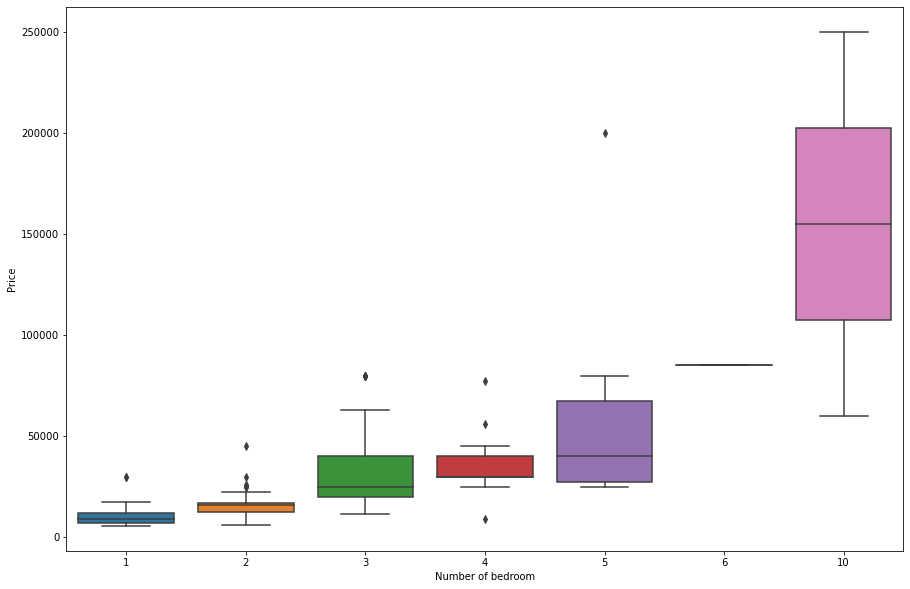

In [799]:
plt.figure(figsize=(15,10))
sns.boxplot(x =df['Number of bedroom'], y = df['Price'])

(array([243.,  42.,   6.,   7.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  5500.,  29950.,  54400.,  78850., 103300., 127750., 152200.,
        176650., 201100., 225550., 250000.]),
 <BarContainer object of 10 artists>)

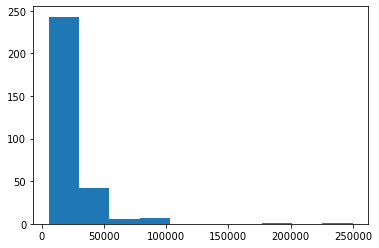

In [801]:
plt.hist(df['Price'])


<Figure size 1440x1440 with 0 Axes>

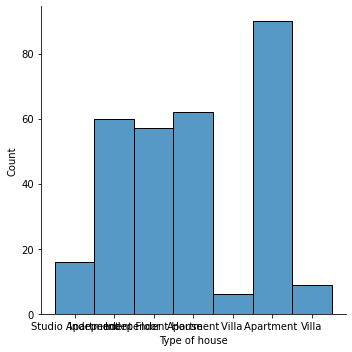

In [794]:
plt.figure(figsize=(20,20))
sns.displot(df['Type of house'])


/Users/ram/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of house', ylabel='count'>

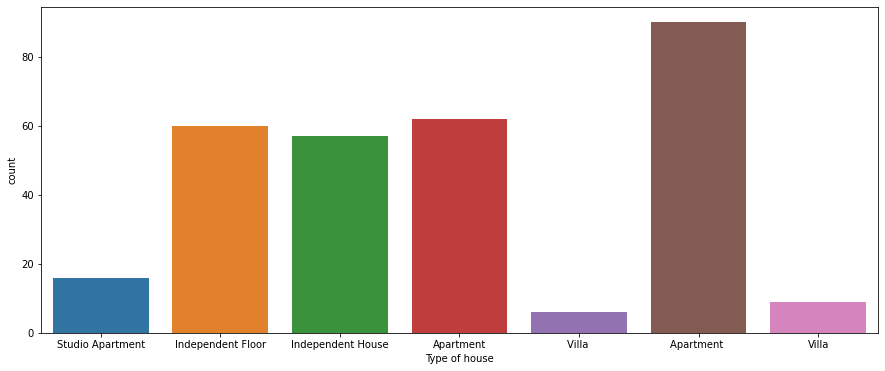

In [806]:
plt.figure(figsize = (15,6))
sns.countplot(df['Type of house'])